In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [14]:
data = pd.read_csv("WineDataset.csv")

In [15]:
data.isna().sum()
# нет пропущенных значений - GOOD

Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
Wine                            0
dtype: int64

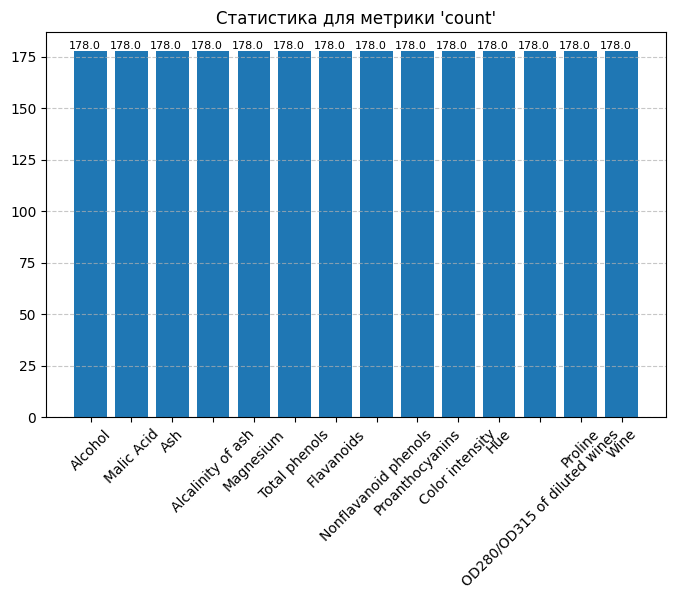

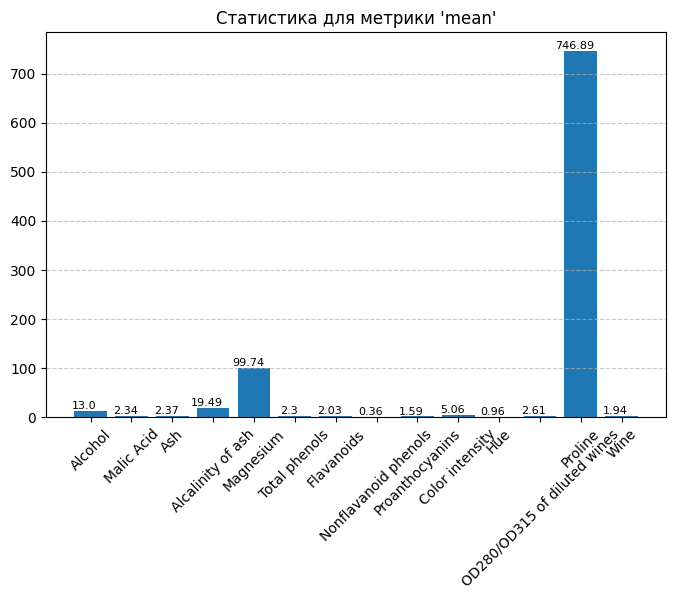

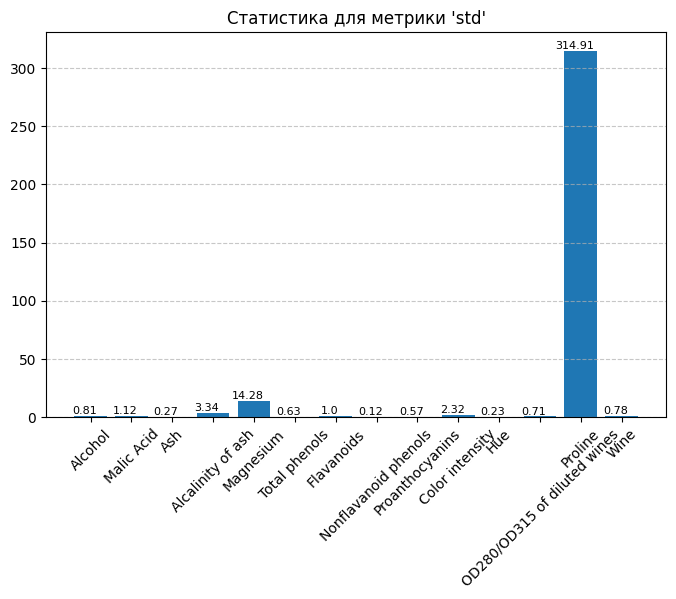

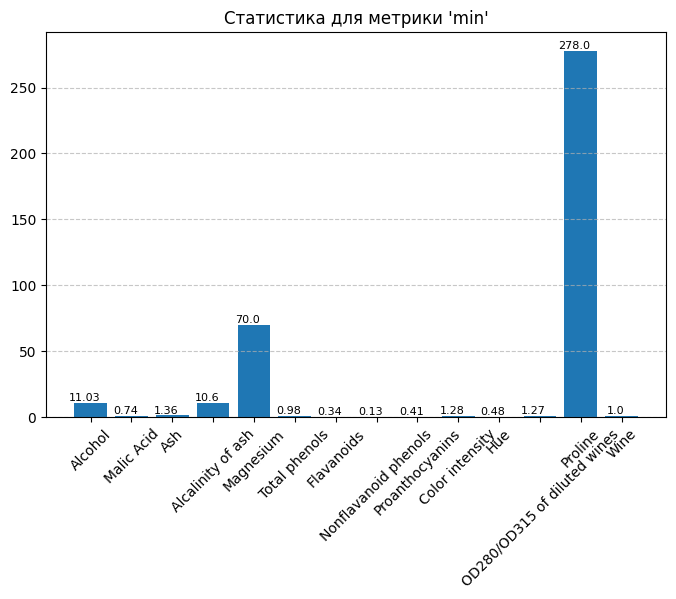

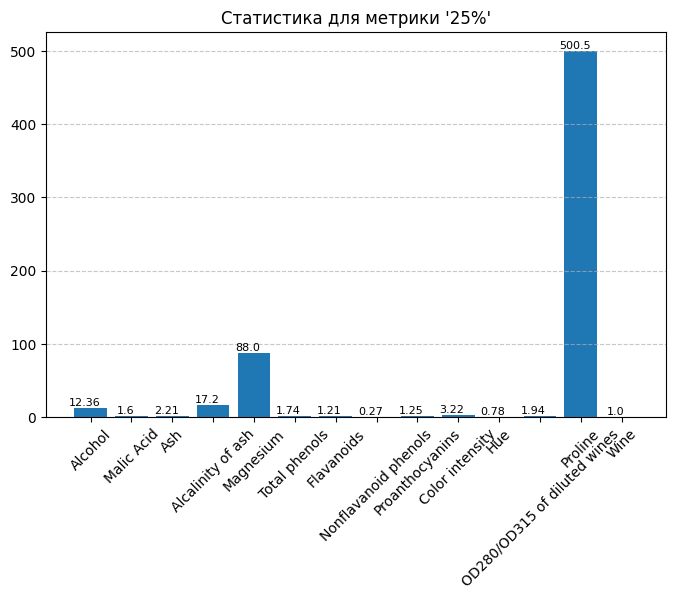

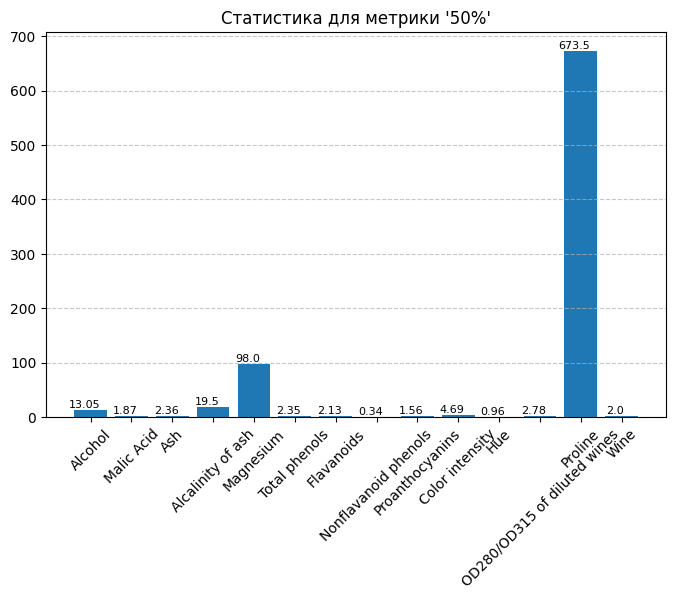

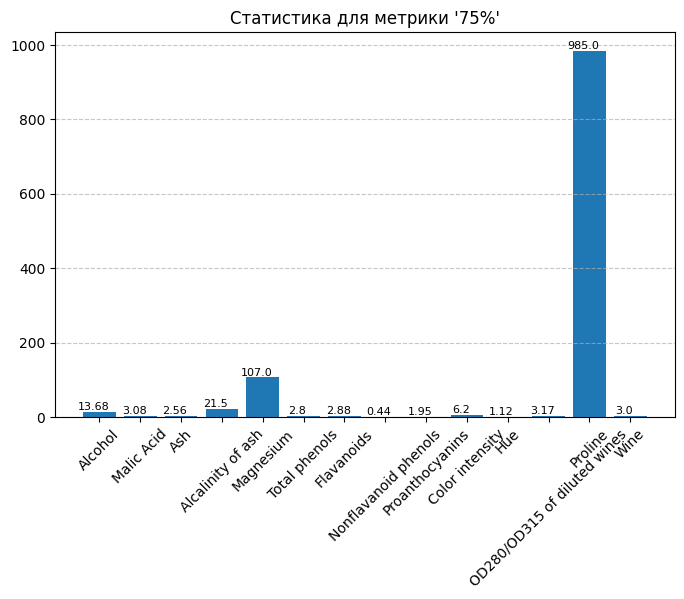

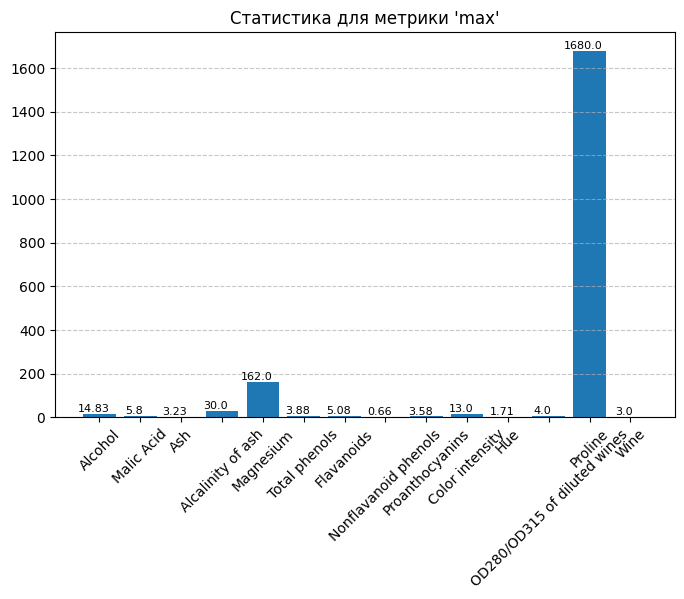

          Alcohol  Malic Acid         Ash  Alcalinity of ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

In [16]:
# Получение статистики с помощью метода describe
statistics = data.describe()

# Визуализация статистики
for metric in statistics.index:
    plt.figure(figsize=(8, 5))
    plt.title(f"Статистика для метрики '{metric}'")
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    bars = plt.bar(statistics.columns, statistics.loc[metric])

    # Добавляем значения к столбцам
    for bar, value in zip(bars, statistics.loc[metric]):
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, value, str(round(value, 2)), ha='center', va='bottom', fontsize=8)

    plt.show()

# Вывод статистики
print(statistics)

In [17]:
def normalize_data(data_frame: pd.DataFrame):
    min_max_scaler = lambda x: (x - np.min(x)) / (np.max(x) - np.min(x))
    data_frame = data_frame.apply(min_max_scaler, axis=0)  # Центрирование и шкалирование
    return data_frame

In [18]:
data = normalize_data(data)
data.head()

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0


In [85]:
def my_confusion_matrix(y_true, y_pred):
    y_pred = y_pred.to_numpy()
    # Получаем уникальные классы в y_true
    classes = np.unique(y_true)
    num_classes = len(classes)

    # Инициализируем матрицу ошибок нулями
    confusion = np.zeros((num_classes, num_classes), dtype=np.float64)

    # Заполняем матрицу ошибок
    for i in range(len(y_true)):
        true_class = np.where(classes == y_true[i])[0]
        pred_class = np.where(classes == y_pred[i])[0]
        ok = False
        if len(true_class) == 0:
            ok = True
            true_class = []
        else:
            true_class = true_class[0]
        if len(pred_class) == 0:
            ok = True
            pred_class = []
        else:
            pred_class = pred_class[0]
        if not ok:
            confusion[true_class][pred_class] += 1

    return confusion


def my_f1_score(y_true, y_pred):
    # Вычисляем матрицу ошибок
    confusion = my_confusion_matrix(y_true, y_pred)

    print(confusion)

    # Извлекаем TP, FP и FN из матрицы ошибок
    TP = confusion[1, 1]  # Истинно положительные
    FP = confusion[0, 1]  # Ложноположительные
    FN = confusion[1, 0]  # Ложноотрицательные

    # Вычисляем точность и полноту
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)

    # Вычисляем F1-меру
    f1_score = 2 * (precision * recall) / (precision + recall)

    return f1_score

In [20]:
class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X.to_numpy()
        self.y_train = y.to_numpy()

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X):
        X = X.to_numpy()
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Рассчитываем расстояния между x и всеми точками в обучающем наборе данных
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        # Получаем индексы k ближайших точек
        k_indices = np.argsort(distances)[:self.k]
        # Получаем метки классов ближайших точек
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Находим наиболее часто встречающийся класс среди ближайших точек
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

In [21]:
from sklearn.model_selection import train_test_split

In [71]:
data[columns]["Wine"]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
173    1.0
174    1.0
175    1.0
176    1.0
177    1.0
Name: Wine, Length: 178, dtype: float64

In [80]:
k_values = [3, 5, 10]
TARGET_COLUMN = "Wine"
columns = random.sample(list(set(data.columns)), k=random.randint(2, 5))
for kkk in k_values:

    print('Model 1. Признаки случайно отбираются')
    print(f'k = {kkk}')
    if TARGET_COLUMN not in columns:
        columns += [TARGET_COLUMN]
    data_frame = data[columns]
    print('Columns: ', end='')
    print(*data_frame.columns, sep=', ')
    X_train, X_test, y_train, y_test = train_test_split(
        data_frame.drop([TARGET_COLUMN], axis=1),
        data_frame[TARGET_COLUMN],
        test_size=0.2
    )
    knn = KNNClassifier(k=kkk)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    confusion_matrix = my_confusion_matrix(y_pred, y_test)
    f1 = my_f1_score(y_pred, y_test)
    print('Confusion matrix: \n', confusion_matrix)
    print('F1 score: ', f1)
    print('*' * 30)

Model 1. Признаки случайно отбираются
k = 3
Columns: Proanthocyanins, Ash, Color intensity, Flavanoids, Wine
Confusion matrix: 
 [[10.  0.]
 [ 0. 14.]]
F1 score:  1.0
******************************
Model 1. Признаки случайно отбираются
k = 5
Columns: Proanthocyanins, Ash, Color intensity, Flavanoids, Wine
Confusion matrix: 
 [[12.  0.]
 [ 0. 12.]]
F1 score:  1.0
******************************
Model 1. Признаки случайно отбираются
k = 10
Columns: Proanthocyanins, Ash, Color intensity, Flavanoids, Wine
Confusion matrix: 
 [[10.  0.]
 [ 0.  7.]]
F1 score:  1.0
******************************


In [92]:
k_values = [3, 5, 10]
TARGET_COLUMN = "Wine"
columns = ["Alcohol", "Magnesium"]
for kkk in k_values:

    print('Model 2. Фиксированный набор признаков, который выбирается заранее.')
    print(f'k = {kkk}')
    if TARGET_COLUMN not in columns:
        columns += [TARGET_COLUMN]
    data_frame = data[columns]
    print('Columns: ', end='')
    print(*data_frame.columns, sep=', ')
    X_train, X_test, y_train, y_test = train_test_split(
        data_frame.drop([TARGET_COLUMN], axis=1),
        data_frame[TARGET_COLUMN],
        test_size=0.2
    )

    knn = KNNClassifier(k=kkk)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    confusion_matrix = my_confusion_matrix(y_pred, y_test)
    f1 = my_f1_score(y_pred, y_test)
    print('Confusion matrix: \n', confusion_matrix)
    print('F1 score: ', f1)
    print('*' * 30)

Model 2. Фиксированный набор признаков, который выбирается заранее.
k = 3
Columns: Alcohol, Magnesium, Wine
[[12.  3.]
 [ 5.  4.]]
Confusion matrix: 
 [[12.  3.]
 [ 5.  4.]]
F1 score:  0.5
******************************
Model 2. Фиксированный набор признаков, который выбирается заранее.
k = 5
Columns: Alcohol, Magnesium, Wine
[[12.  1.]
 [ 1.  5.]]
Confusion matrix: 
 [[12.  1.]
 [ 1.  5.]]
F1 score:  0.8333333333333334
******************************
Model 2. Фиксированный набор признаков, который выбирается заранее.
k = 10
Columns: Alcohol, Magnesium, Wine
[[ 8. 10.]
 [ 1.  1.]]
Confusion matrix: 
 [[ 8. 10.]
 [ 1.  1.]]
F1 score:  0.15384615384615385
******************************
